In [161]:
import pandas as pd
import numpy as np

# Read the File

In [162]:
df = pd.read_csv(r'C:\Users\admin\Downloads\data.csv')

# Top five Rows

In [163]:
df.head(100)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
95,1,8,455.0,225,4951,11.0,1973,buick electra 225 custom,5.101724
96,1,8,360.0,175,3821,11.0,1973,amc ambassador brougham,5.526868
97,1,6,225.0,105,3121,16.5,1973,plymouth valiant,7.652587
98,1,6,250.0,100,3278,18.0,1973,chevrolet nova custom,6.802299


## Last 5 Rows

In [164]:
df.tail()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024
397,1,4,119.0,82,2720,19.4,1982,chevy s-10,13.179455


### Tell about the data dtypes and null values

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## Description of data set

In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
origin,398.0,1.572864,0.802055,1.000000,1.000000,1.000000,2.000000,3.000000
cylinders,398.0,5.454774,1.701004,3.000000,4.000000,4.000000,8.000000,8.000000
displacement,398.0,193.425879,104.269838,68.000000,104.250000,148.500000,262.000000,455.000000
weight,398.0,2970.424623,846.841774,1613.000000,2223.750000,2803.500000,3608.000000,5140.000000
acceleration,398.0,15.568090,2.757689,8.000000,13.825000,15.500000,17.175000,24.800000
year,398.0,1976.010050,3.697627,1970.000000,1973.000000,1976.000000,1979.000000,1982.000000
Kilometer_per_liter,398.0,9.997073,3.322917,3.826293,7.440015,9.778305,12.329168,19.811697


## Check missing values

In [167]:
df.isna().apply(pd.value_counts).T

,False
origin,398
cylinders,398
displacement,398
horsepower,398
weight,398
acceleration,398
year,398
name,398
Kilometer_per_liter,398


## Fill the missing value

In [159]:
df['horsepower']=df['horsepower'].replace('?',0)

In [160]:
df['horsepower']=df['horsepower'].astype('float')

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation

A correlation matrix is a table containing correlation coefficients between variables. 
Each cell in the table represents the correlation between two variables. The value lies between -1 and 1


In [169]:
corr=df.corr()

In [170]:
corr

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
origin,1.000000,-0.562543,-0.609409,-0.581024,0.205873,0.180662,0.563450
cylinders,-0.562543,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.775396
displacement,-0.609409,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.804203
weight,-0.581024,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.831741
acceleration,0.205873,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.420289
year,0.180662,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.579267
Kilometer_per_liter,0.563450,-0.775396,-0.804203,-0.831741,0.420289,0.579267,1.000000


### Heat map


Following is the heat map of the corelation of the dependent attributes with the independent attributes which is changes in this data.

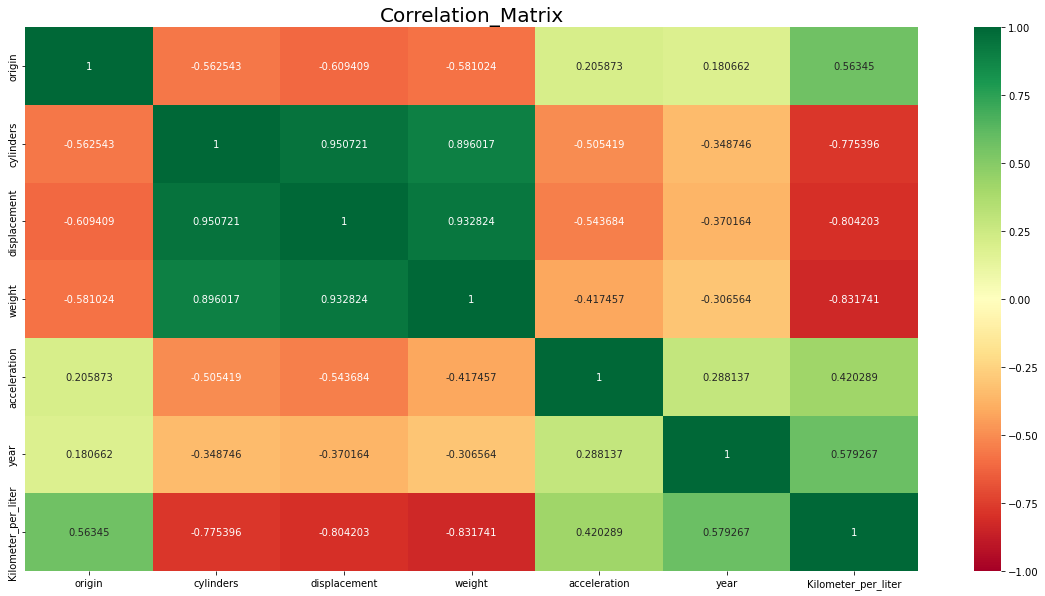

In [171]:
plt.figure(figsize=(20,10))
plt.title('Correlation_Matrix',fontsize=20)
sns.heatmap(corr,vmax=1.0,vmin=-1.0,fmt='g',cmap='RdYlGn',annot=True)
plt.show()

In [156]:
a=corr[['Kilometer_per_liter']]

## Zoomed Heatmap

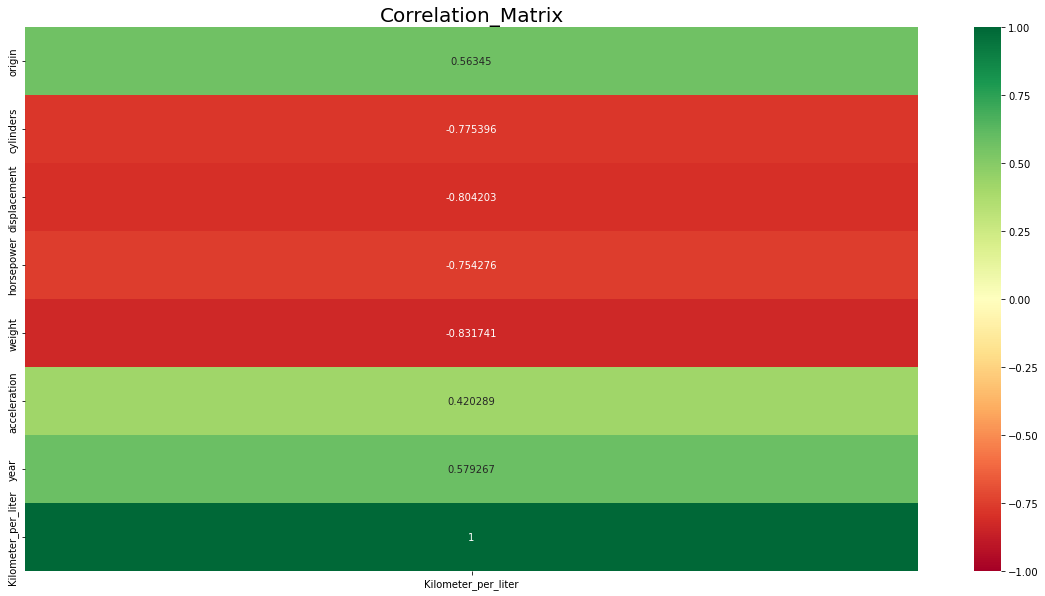

In [157]:
plt.figure(figsize=(20,10))
plt.title('Correlation_Matrix',fontsize=20)
sns.heatmap(a,vmax=1.0,vmin=-1.0,fmt='g',cmap='RdYlGn',annot=True)
plt.show()

### Drop Column

In [172]:
df.drop(['name'],axis=1,inplace=True)

# Boxplot

## Five Number Summary of Visuvalisation

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


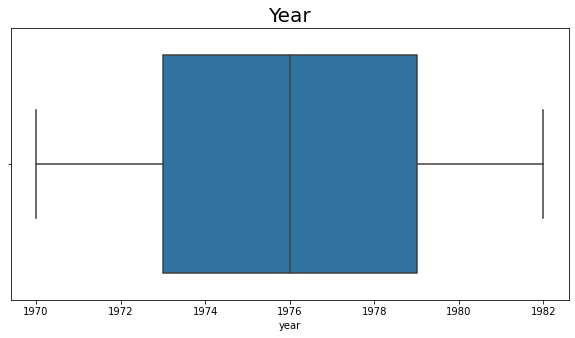

In [128]:
plt.figure(figsize=(10,5))
plt.title('Year',fontsize=20)
sns.boxplot(df['year'])
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


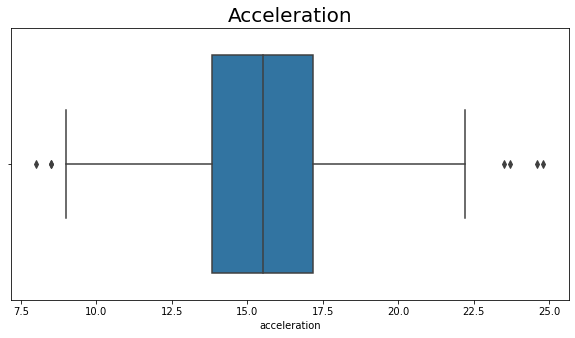

In [176]:
plt.figure(figsize=(10,5))
sns.boxplot(df['acceleration'])
plt.title('Acceleration',fontsize=20)
plt.show()

# Distplot

Distplot depictsthe variation in the data distribution as mentioned below graph shows that if insides of the data
 gives the left peak with right tail then it tells us that the mentioned data has positive values and if the inside 
has right peak with left tai# then the data has neagtives values

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


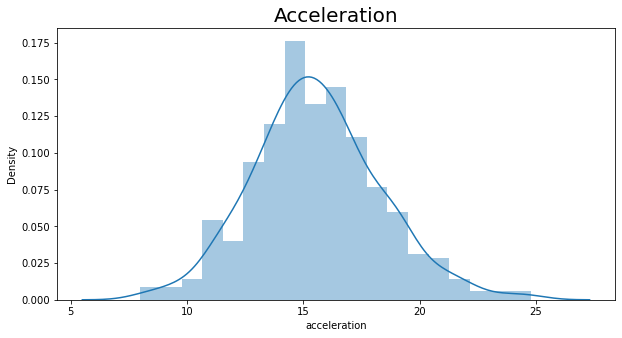

In [173]:
plt.figure(figsize=(10,5))
sns.distplot(df['acceleration'])
plt.title('Acceleration',fontsize=20)

plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


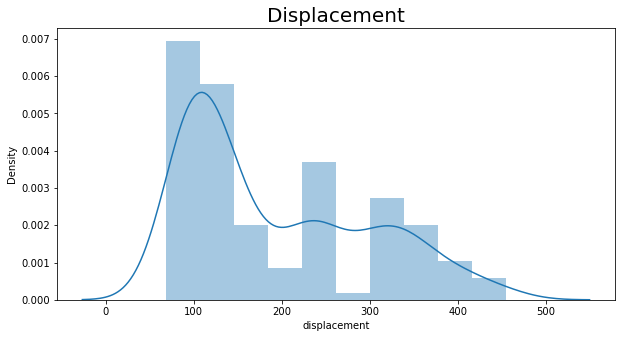

In [177]:
plt.figure(figsize=(10,5))
sns.distplot(df['displacement'])
plt.title('Displacement',fontsize=20)

plt.show()

In [132]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter'],
      dtype='object')

### Taking Independent Variable

In [179]:
x=df[['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year']]

### Taking dependent Variable

In [181]:
y=df[['Kilometer_per_liter']]

#### Import Library for spliting data

In [135]:
from sklearn.model_selection import train_test_split

#### Split the Data

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [184]:
#### Import Linear Regression Library

In [137]:
from sklearn.linear_model import LinearRegression

#### Object Creation

In [138]:
model=LinearRegression()

#### Train the Data

In [185]:
model.fit(x_train,y_train)

LinearRegression()

#### Testing the data/model or predicting the data (y^)


In [140]:
y_hat = model.predict(x_test)

#### Importing R2 square Library

In [141]:
from sklearn.metrics import r2_score

#### R2 Square

In [142]:
r2_score(y_test,y_hat)*100

84.93630795060805

#### Adjust R2 Square

In [143]:
adj_r2_score = 1-(1-model.score(x_test,y_test))*len((y_train)-1)/(len(y_train)-y_test.shape[1]-1)

#### Adjust R2 Square in percentage(%)

In [144]:
adj_r2_score*100

84.82715076184435

#### Importing Mean Squared Library

In [145]:
from sklearn.metrics import mean_squared_error

#### Mean Square Error

In [146]:
mean_squared_error(y_test,y_hat)

1.5918909605643956

In [147]:
1/1-model.score(x_test,y_test)

0.1506369204939194